# Credit Card Default Analysis

In [1]:
import jupyterthemes as jt
from jupyterthemes import jtplot
!jt -l
!jt -t onedork -ofs 10 -dfs 9 -nfs 11 -tfs 11
jtplot.style(theme = 'onedork', fscale = 1.4 , context = 'notebook', ticks = True, 
             grid = False)

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests
import scipy.stats as sts
from statsmodels.stats.weightstats import *
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# EDA

Поделим клиентов на 2 категории: вернули кредит или нет

In [6]:
good_credit = data.loc[data['default'] == 0]
bad_credit = data.loc[data['default'] == 1]

Проверим сбалансированы ли классы

 - В выборке клиентов с незакрытыми кредитами меньше, однако выборку нельзя назвать сильно несбалансированной

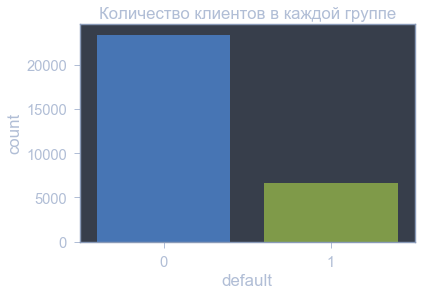

In [7]:
plt.figure(figsize = (6, 4))
sns.countplot(x = data['default'])
plt.title(u'Количество клиентов в каждой группе')
plt.show()

# LIMIT_BAL


Проверим гипотезу о равенстве медианных значений суммы кредита для двух групп
 - Выборочные медианы для обеих групп:

In [8]:
print 'Медиана LIMIT_BAL для хороших заемщиков:', good_credit['LIMIT_BAL'].median()
print 'Медиана LIMIT_BAL для плохих заемщиков:', bad_credit['LIMIT_BAL'].median()

Медиана LIMIT_BAL для хороших заемщиков: 150000.0
Медиана LIMIT_BAL для плохих заемщиков: 90000.0


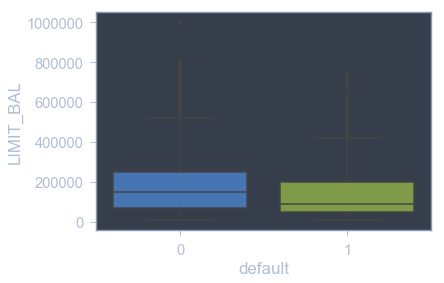

In [9]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'default', y = 'LIMIT_BAL', data = data)
plt.show()

Исходя из графика распределения сумм кредитов можно сделать несколько выводов:
1. Большие суммы клиенты отдают чаще.
2. Всех больше не возвращают кредиты в интервале до 100000.
3. Оба распределения не похожи на нормальные

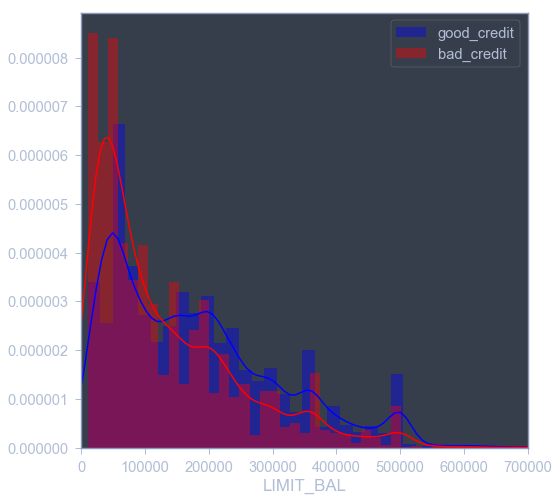

In [10]:
plt.figure(figsize = (8, 8))
sns.distplot(good_credit['LIMIT_BAL'], color = 'blue', label = 'good_credit')
sns.distplot(bad_credit['LIMIT_BAL'], color = 'red', label = 'bad_credit')
plt.legend()
plt.xlim(0, 700000)
plt.show()

Построив Q-Q графики убедились, что распределения не подчиняются нормальному закону

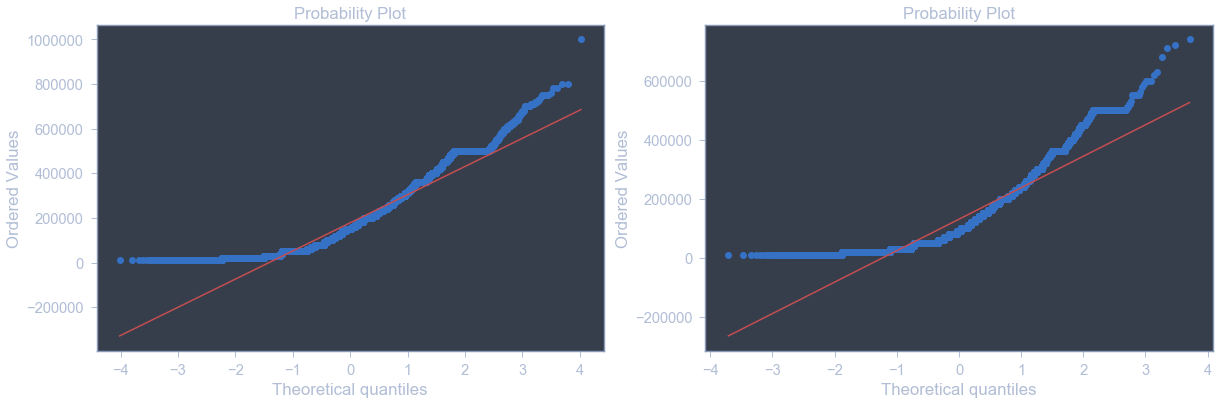

Достигаемый уровень значимости критерия Шапиро-Уилка для 1 группы: 0.0
Достигаемый уровень значимости критерия Шапиро-Уилка для 2 группы: 0.0


D:\Python\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [11]:
plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
sts.probplot(good_credit['LIMIT_BAL'], dist = 'norm', plot = plt)

plt.subplot(1, 2, 2)
sts.probplot(bad_credit['LIMIT_BAL'], dist = 'norm', plot = plt)

plt.show()

print 'Достигаемый уровень значимости критерия Шапиро-Уилка для 1 группы:',\
                                                               sts.shapiro(good_credit['LIMIT_BAL'])[1]
print 'Достигаемый уровень значимости критерия Шапиро-Уилка для 2 группы:',\
                                                               sts.shapiro(bad_credit['LIMIT_BAL'])[1]

Проверим гипотезу о равенстве медиан для обеих групп, построив доверительные интервалы с помощью бутстрпапа.

 - Сформируем по 1000 бутстрапированных псевдовыборок и вычислим медиану для каждой из них

In [12]:
#bootstrap function
def bootstrap(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

#percentile fucntion
def percentile(stat, alpha = 0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2, 100 * (1 - alpha / 2 )])
    return boundaries

In [13]:
good_median = map(np.median, bootstrap(good_credit['LIMIT_BAL'].values, 1000))
bad_median = map(np.median, bootstrap(bad_credit['LIMIT_BAL'].values, 1000))

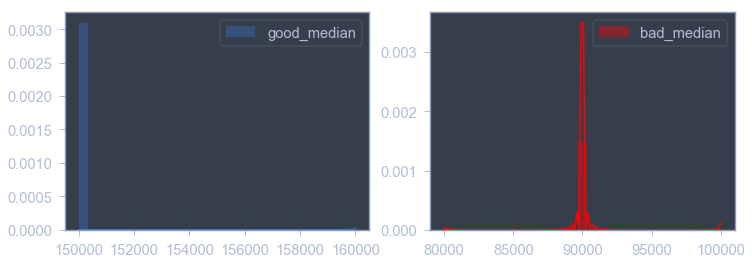

In [14]:
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.distplot(good_median, label = 'good_median')
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(bad_median, label = 'bad_median', color = 'red')
plt.legend()
plt.show()

In [15]:
diff_median = map(lambda x: x[0] - x[1], zip(bad_median, good_median))

 - 95% процентный доверительный интервал для разности медиан меньше нуля.

 - Следовательно, медиана LIMIT_BAL в группе "хороших" клиентов больше, чем в группе "плохих"

In [16]:
print '95% доверительный интервал для разности медиан в 2 группах', percentile(diff_median)

95% доверительный интервал для разности медиан в 2 группах [-70000. -60000.]


Проверим гипотезу о равенстве распределений

Воспользуемся ранговым критерием Манна-Уитни для независимых выборок.

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

 - Нулевая гипотеза уверенно отвергается в пользу альтернативной на уровне значимости 0.05.

 - Нельзя утверждать о равенстве распределений, следовательно средние значения различаются для 2 групп

In [17]:
print 'Достигаемый уровень значимости критерия Манна-Уитни:', \
        stats.mannwhitneyu(good_credit['LIMIT_BAL'], bad_credit['LIMIT_BAL'], alternative = 'two-sided')[1]

Достигаемый уровень значимости критерия Манна-Уитни: 1.2255485818223303e-189


Воспользуемся перестановочным критерием для независимых выборок

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [18]:
def t_stat_ind(data_1, data_2):
    T = np.mean(data_1) - np.mean(data_2)
    return T

In [19]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices] 

In [20]:
def zero_dist(data_1, data_2, max_combinations = None):
    joined_data = np.hstack((data_1, data_2))
    n1 = len(data_1)
    n2 = len(data_2)
    n = len(joined_data)
    
    if max_combinations:
        indices = get_random_combinations(n1, n2, max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    distr = [joined_data[list(i[0])].mean() - joined_data[list(i[1])].mean() \
             for i in indices]
    return distr

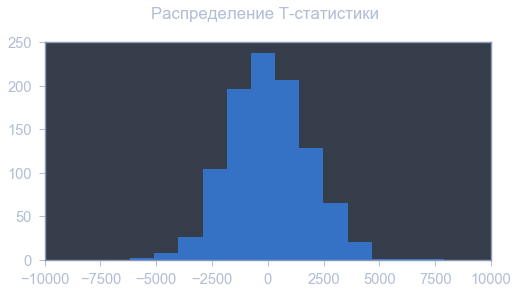

In [21]:
plt.figure(figsize = (8, 4))
plt.hist(zero_dist(good_credit['LIMIT_BAL'].values, bad_credit['LIMIT_BAL'].values, \
                   max_combinations = 1000), bins = 50)
plt.xlim(-10000, 10000)
plt.title(u'Распределение T-статистики \n')
plt.show()

In [22]:
def permutation_test(sample1, sample2, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = t_stat_ind(sample1, sample2)
    
    zero_distr = zero_dist(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

 - Нулевая гипотеза о равенстве распределений на уровне значимости 0.05 отвергается в пользу альтернативной
 - Нельзя утверждать о равенстве средних в обеих группах

In [23]:
print "Достигаемый уровень значимости перестановочного критерия:", \
                         permutation_test(good_credit['LIMIT_BAL'].values, bad_credit['LIMIT_BAL'].values,\
                         max_permutations = 1000)

Достигаемый уровень значимости перестановочного критерия: 0.001


# Задание №2 (SEX)


Проверим гипотезу о том, что гендерный состав группы клиентов вернувших и не вернувших кредит отличается.

$H_0\colon p_{_1} = p_{_2}$ (где $p_{_1}$ - доля мужчин в 1 группе, $p_{_2}$ - доля мужчин во 2 группе)

$H_1\colon p_{_1} != p_{_2} $

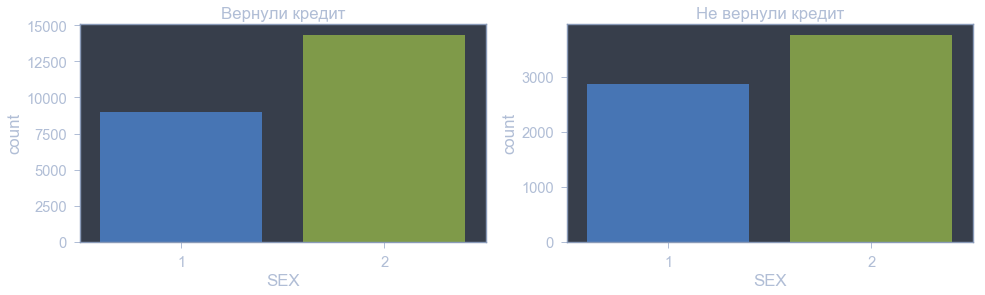

In [24]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.title(u'Вернули кредит')
sns.countplot(x = good_credit['SEX'])

plt.subplot(1, 2, 2)
plt.title(u'Не вернули кредит')
sns.countplot(x = bad_credit['SEX'])

plt.show()

In [25]:
#Таблица наблюдаемых частот
sex = pd.pivot_table(data, values = 'ID', index = 'default', 
                                 columns = 'SEX', aggfunc = 'count', fill_value = 0)

#Таблица долей полов в завимисоти от группы клиентов (вернули или нет)
sex_p = sex.div(sex.sum(axis = 1), axis = 0)

#Сравниеаем долю мужчин в каждой категории клиентов
sex_p = sex_p.iloc[:, 0]
sex_p = pd.DataFrame({'p man' : sex_p})
sex_p = sex_p.reset_index()
sex_p

,default,p man
0,0,0.385850
1,1,0.432942


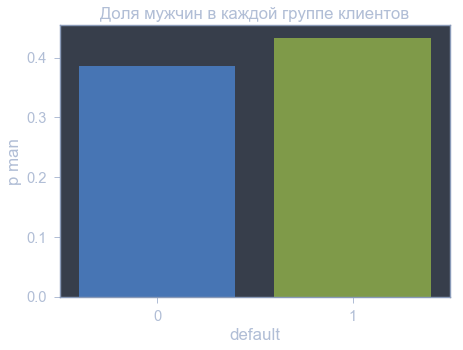

In [26]:
plt.figure(figsize = (7, 5))
sns.barplot(x = 'default', y = 'p man', data = sex_p)
plt.title(u'Доля мужчин в каждой группе клиентов')
plt.show()

Проверим гипотезу, используя доверительный интервал для разности долей для двух независимых выборок

In [27]:
def interval(data, man = 1, alpha = 0.05):
    norm = sts.norm()
    z = norm.ppf(1 - alpha / 2)
    
    val_1 = float(data['SEX'][data['default'] == 0].value_counts()[man])
    n_1 = len(data[data['default'] == 0])
    p_1 = val_1 / n_1
    
    val_2 = float(data['SEX'][data['default'] == 1].value_counts()[man])
    n_2 = len(data[data['default'] == 1])
    p_2 = val_2 / n_2
    
    boundaries = [round((p_1 - p_2) - z * (np.sqrt((p_1 * (1 - p_1) / n_1) + (p_2 * (1 - p_2) / n_2))), 3), 
                 round((p_1 - p_2) + z * (np.sqrt((p_1 * (1 - p_1) / n_1) + (p_2 * (1 - p_2) / n_2))), 3)]
    return boundaries

 - 95% доверительный интервал для разности долей меньше нуля 
 - Доля в мужчин двух группах отличается (доля в группе вернувших кредит клиентов больше, чем доля в группе не вернувших)

In [28]:
print '95% доверительный интервал для разности долей мужчин и женщин не вернувших кредиты:', interval(data)

95% доверительный интервал для разности долей мужчин и женщин не вернувших кредиты: [-0.061, -0.034]


Проверим гипотезу о равенстве долей мужчин в двух группах против двухсторонней альтернативы

Воспользуемся z-критерием для доли для 2 независимых выборок.

$H_0\colon p_{_1} = p_{_2}$ (где $p_{_1}$ - доля мужчин в 1 группе, $p_{_2}$ - доля мужчин во 2 группе)

$H_1\colon p_{_1} != p_{_2} $

In [29]:
def z_stat(data, man = 1, alpha = 0.05, alternative = 'two_sided'):
    norm = sts.norm()
    
    val_1 = float(data['SEX'][data['default'] == 0].value_counts()[man])
    n_1 = len(data[data['default'] == 0])
    p_1 = val_1 / n_1
    
    val_2 = float(data['SEX'][data['default'] == 1].value_counts()[man])
    n_2 = len(data[data['default'] == 1])
    p_2 = val_2 / n_2
    
    P = (p_1 * n_1 + p_2 * n_2) / (n_1 + n_2)
    Z = (p_1 - p_2) / (np.sqrt((P * (1 - P)) * (1 / n_1 + 1 / n_2)))
    
    if alternative == 'two_sided':
        return 2 * (1 - (norm.cdf(np.abs(Z))))
    
    elif alternative == 'less':
        return norm.cdf((Z))

    elif alternative == 'greater':
        return (1 - (norm.cdf((Z))))

На уровне значимости 0.05 нулевая гипотеза о равенстве долей в обеих группах отвергается в пользу альтернативной

In [30]:
print 'Достигаемый уровень значимости z-критерия для долей мужчин в обеих группах:', z_stat(data)

Достигаемый уровень значимости z-критерия для долей мужчин в обеих группах: 0.0


D:\Python\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


# Задание №3 (EDUCATION)

Проверим гипотезу, что образование не влияет на то, вернет ли человек долг.

 - В выборке преобладают клиенты, имеющие степень бакалавра

 - В выборке нет клиентов с докторской степенью, кто не вернул кредит. Однако таких клиентов только 14

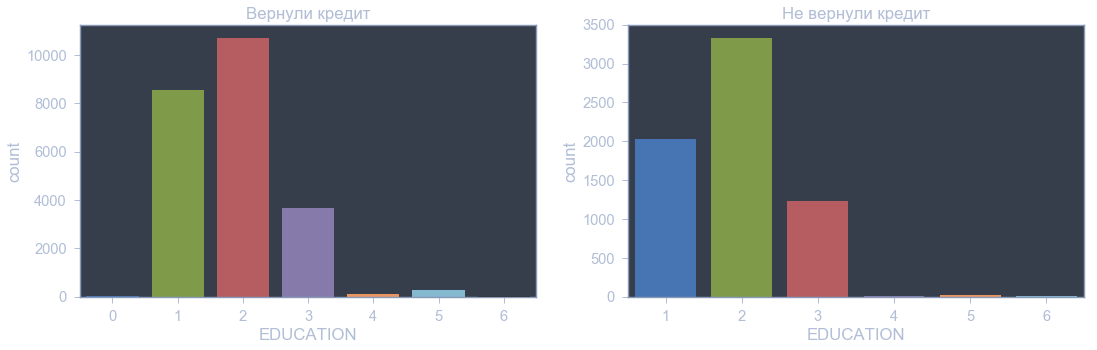

In [31]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
sns.countplot(x = good_credit['EDUCATION'])
plt.title(u'Вернули кредит')

plt.subplot(1, 2, 2)
sns.countplot(x = bad_credit['EDUCATION'])
plt.title(u'Не вернули кредит')
plt.show()

 - У клиентов со средним профессиональным образованием наблюдается высокая доля невозврата кредитов 

 - То же самое можно сказать про клиентов со степенью бакалавра.

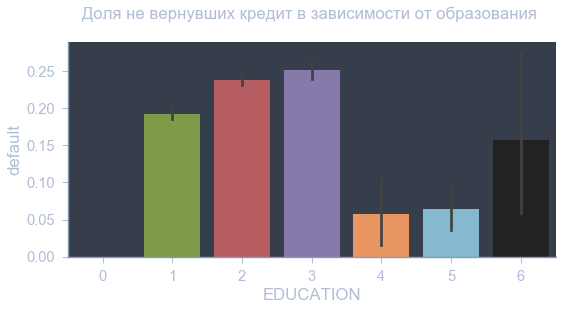

In [32]:
sns.catplot(x = 'EDUCATION', y = 'default', data = data,
            kind = 'bar', height = 4, aspect = 2)
plt.title(u'Доля не вернувших кредит в зависимости от образования \n')
plt.show()

Сформулируем гипотезу:

 - Если образование не влияет на возврат кредита, то распределение должно быть равномерным (доля отдающих кредиты одинакова для всех видов образования)
 - Если же распределение будет отлично от равномерного, следовательно образование влияет на возврат кредита.

Проверим гипотезу с помощью критерия Хи-квадрат.

$H_0\colon F(x) - $ Равномерное

$H_1\colon F(x) - $ Неравномерное

In [33]:
#Таблица наблюдаемых частот
education = pd.pivot_table(data, values = 'ID', index = 'default', 
                                 columns = 'EDUCATION', aggfunc = 'count', fill_value = 0)

#Таблица долей возвратов по каждой группе обзраования
education_p = education.div(education.sum(axis = 0), axis = 1)

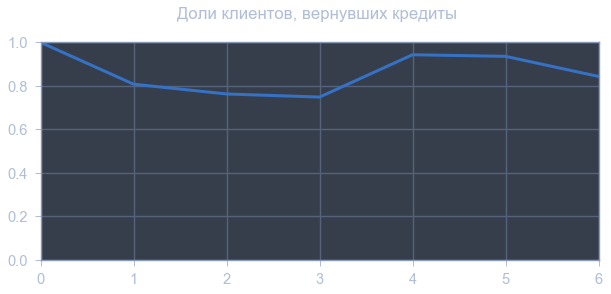

In [34]:
plt.figure(figsize = (10, 4))
plt.title(u'Доли клиентов, вернувших кредиты \n')
plt.plot(education_p.loc[0], linewidth = 3)
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.grid()

Нулевая гипотеза о равномерности распределения означает, что доля клиентов, вернувших (не вернувших) кредиты одинакова для каждого типа образования

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$
При справедливости нулевой гипотезы распределение статистики имеет распределение хи-квадрат с числом степеней свободы $K$ $-$ $3$


In [35]:
#Доля возврата кредитов при условии равномерности распределения (нулевая гипотеза)
p = education_p.mean(axis = 1)[0]

#Количество клиентов в каждой группе
n = education.sum(axis = 0)

#Наблюдаемые величины для клиентов, вернувших кредиты
observed_values = pd.DataFrame({'observed values' : education.iloc[0, :]}).reset_index()

#Ожидаемые величины клиентов, вернувших кредиты, при условии равномерности распределения
expected_values = pd.DataFrame({'expected values' : np.around(n[:] * p)}).reset_index()

pd.concat([observed_values['observed values'], 
                            expected_values['expected values']], axis = 1)

,observed values,expected values
0,14,12.0
1,8549,9134.0
2,10700,12107.0
3,3680,4243.0
4,116,106.0
5,262,242.0
6,43,44.0


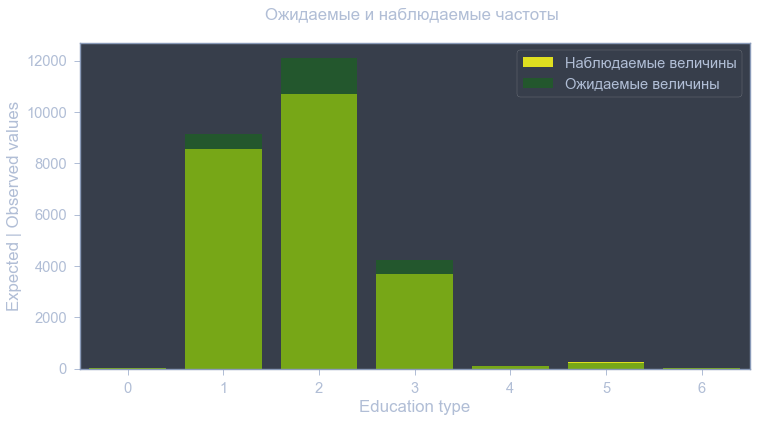

In [36]:
plt.figure(figsize = (12, 6))

sns.barplot(x = 'EDUCATION', y = 'observed values', data = observed_values, alpha = 1,
            color = 'yellow', label = u'Наблюдаемые величины')
sns.barplot(x = 'EDUCATION', y = 'expected values', data = expected_values, alpha = 0.5,
            color = 'green', label = u'Ожидаемые величины')
plt.ylabel('Expected | Observed values')
plt.xlabel('Education type')
plt.title(u'Ожидаемые и наблюдаемые частоты \n')
plt.legend()
plt.show()

- Нулевая гипотеза о равномерности распределения уверенно отвергается в пользу альтернативной 

- Образование влияет на возврат кредита

In [37]:
print 'Достигаемый уровень значимости критерия Хи-квадрат:', \
                         stats.chisquare(observed_values['observed values'], 
                                         expected_values['expected values'], ddof = 1)[1]

Достигаемый уровень значимости критерия Хи-квадрат: 3.907958481011075e-58


# Задание №4 (MARRIAGE)

Гипотеза: семейный статус влияет на возврат кредита

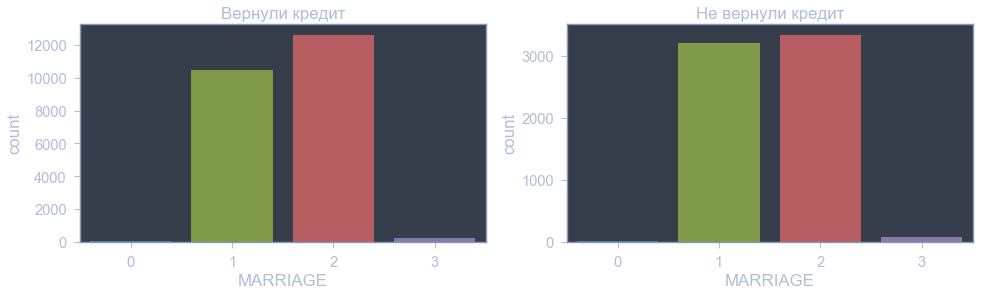

In [38]:
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
plt.title(u'Вернули кредит')
sns.countplot(x = good_credit['MARRIAGE'])

plt.subplot(1, 2, 2)
sns.countplot(x = bad_credit['MARRIAGE'])
plt.title(u'Не вернули кредит')
plt.show()

<Figure size 864x432 with 0 Axes>

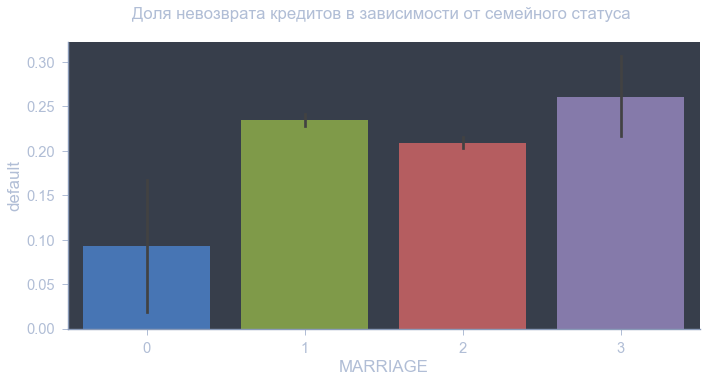

In [39]:
plt.figure(figsize = (12, 6))
sns.catplot(x = 'MARRIAGE', y = 'default', data = data,
            kind = 'bar', height = 5, aspect = 2)
plt.title(U'Доля невозврата кредитов в зависимости от семейного статуса \n')
plt.show()

Так как величины являются категориальными, можно определить их корреляцию с помощью коэффициента Крамера

In [40]:
#Таблица наблюдаемых частот
marriage = pd.pivot_table(data, values = 'ID', index = 'default', 
                          columns = 'MARRIAGE', aggfunc = 'count', fill_value = 0)

#Таблица долей возвратов по каждой из групп
marriage_p = marriage.div(marriage.sum(axis = 0), axis = 1)

marriage

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


Данный коэффициент принимает значения в диапазоне [0, 1]:

 - 0 - означает полное отсуствие взаимосвязи 
 - 1 - полное совпадение переменных

Исходя из полученного значения можно сделать вывод, что семейное положение не особо влияет на возврат кредита

In [41]:
#Score V_kramer coefficient
def V_kramer(data):
    hi2 = sts.chi2_contingency(data)[0]
    v_kramer = np.sqrt(hi2 / (np.sum(data) * (min(data.shape) - 1)))
    return v_kramer

print 'Коэффициент V-Крамера:', V_kramer(marriage.values)

Коэффициент V-Крамера: 0.034478203662766466


Проверим гипотезу с помощью критерия Хи-квадрат.

$H_0\colon F(x)  - $ Равномерное

$H_1\colon F(x)  - $ Неравномерное

In [42]:
#Доля возврата кредитов при условии равномерности распределения (нулевая гипотеза)
p = marriage_p.mean(axis = 1)[0]

#Количество клиентов в каждой группе
n = marriage.sum(axis = 0)

#Наблюдаемые величины для клиентов, вернувших кредиты
observed_values = pd.DataFrame({'observed values' : marriage.iloc[0, :]}).reset_index()

#Ожидаемые величины клиентов, вернувших кредиты, при условии равномерности распределения
expected_values = pd.DataFrame({'expected values' : np.round(n[:] * p)}).reset_index()

pd.concat([observed_values['observed values'], 
                            expected_values['expected values']], axis = 1)

,observed values,expected values
0,49,43.0
1,10453,10939.0
2,12623,12785.0
3,239,259.0


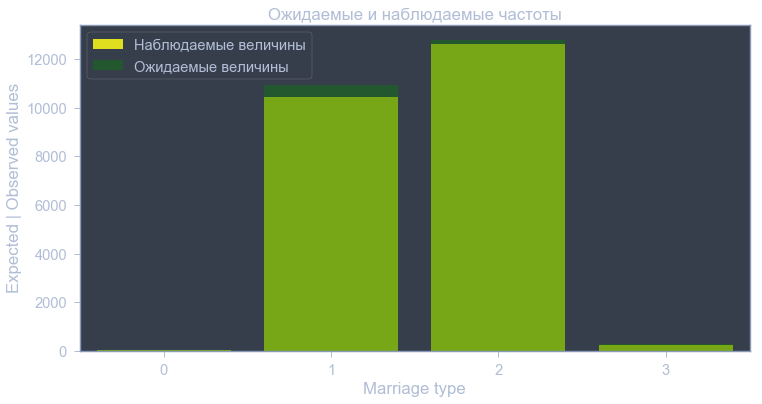

In [43]:
plt.figure(figsize = (12, 6))

sns.barplot(x = 'MARRIAGE', y = 'observed values', data = observed_values, alpha = 1,
            color = 'yellow', label = u'Наблюдаемые величины')
sns.barplot(x = 'MARRIAGE', y = 'expected values', data = expected_values, alpha = 0.5,
            color = 'green', label = u'Ожидаемые величины')
plt.ylabel('Expected | Observed values')
plt.xlabel('Marriage type')
plt.title(u'Ожидаемые и наблюдаемые частоты')
plt.legend()
plt.show()

- На уровне значимости 0.05 нулевая гипотеза о равномерности распределения отвергается
- Семейный статус влияет на возврат кредита

In [44]:
print 'Достигаемый уровень значимости критерия Хи-квадрат:', \
                         stats.chisquare(observed_values['observed values'], 
                                         expected_values['expected values'], ddof = 1)[1]

Достигаемый уровень значимости критерия Хи-квадрат: 2.230655063569763e-06


# Задание №5 (AGE)

Проверим гипотезу о равенстве медиан для двух групп клиентов, построив 95% доверительный интервал для разности медиан с помощью бутстрапа.

$H_0\colon med_{_1} = med_{_2} $

$H_1\colon med_{_1}  != med_{_2} $

Выборочные медианы в обеих группах совпадают

In [45]:
print 'Выборочная медиана возраста для хороших клиентов:', good_credit['AGE'].median()
print 'Выборочная медиана возраста для плохих клиентов:', bad_credit['AGE'].median()

Выборочная медиана возраста для хороших клиентов: 34.0
Выборочная медиана возраста для плохих клиентов: 34.0


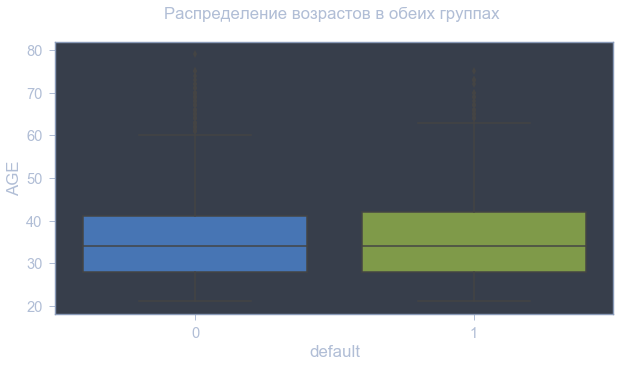

In [46]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'default', y = 'AGE', data = data)
plt.title(u'Распределение возрастов в обеих группах \n')
plt.show()

Плотность распределения возрастов для обеих групп имеют схожую форму

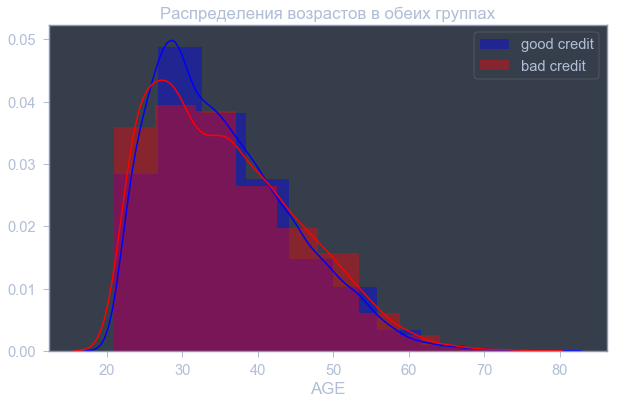

In [47]:
plt.figure(figsize = (10, 6))
sns.distplot(good_credit['AGE'], color = 'blue',  bins = 10, label = 'good credit')
sns.distplot(bad_credit['AGE'], color = 'red',  bins = 10, label = 'bad credit')
plt.title(u'Распределения возрастов в обеих группах')
plt.legend()
plt.show()

 - Распределение возраста похоже на нормальное, однако скошен левый хвост

 - Критерий Шапиро-Уилка отвергает нулевую гипотезу о нормальном распределении возрастов в обеих группах

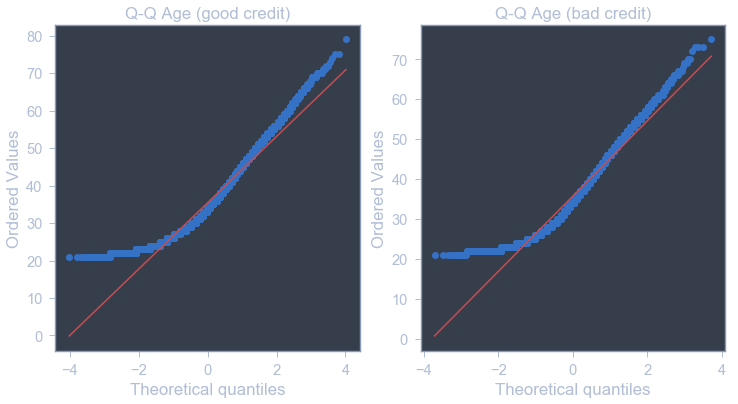

Достигаемый уровень значимости критерия Шапиро-Уилка для хороших клиентов: 0.0
Достигаемый уровень значимости критерия Шапиро-Уилка для плохих клиентов: 1.05798034057e-42


In [48]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
sts.probplot(good_credit['AGE'], plot = plt)
plt.title('Q-Q Age (good credit)')

plt.subplot(1, 2, 2)
sts.probplot(bad_credit['AGE'], plot = plt)
plt.title('Q-Q Age (bad credit)')
plt.show()

print 'Достигаемый уровень значимости критерия Шапиро-Уилка для хороших клиентов:', \
                                                                    sts.shapiro(good_credit['AGE'])[1]
print 'Достигаемый уровень значимости критерия Шапиро-Уилка для плохих клиентов:', \
                                                                    sts.shapiro(bad_credit['AGE'])[1]

Построим 95% доверительный интервал для разности средних по бутстрап выборкам

In [49]:
good_mean = map(np.mean, bootstrap(good_credit['AGE'].values, 1000))
bad_mean = map(np.mean, bootstrap(bad_credit['AGE'].values, 1000))
diff_mean = map(lambda x: x[0] - x[1], zip(bad_mean, good_mean))

 - 95% доверительный интервал для разности выборочных средних очень близок к нулю, но все таки его не содержит. 
 - С праткической точки зрения разность возрастов для двух групп в 0.5 года несущественна

In [50]:
print '95% доверительный интервал для разности выборочных средних значений в двух группах', \
                                                                                    percentile(diff_mean)

95% доверительный интервал для разности выборочных средних значений в двух группах [0.0616644  0.56644247]


Построим 95% доверительный интервал для разности медиан

In [51]:
good_median = map(np.median, bootstrap(good_credit['AGE'].values, 1000))
bad_median = map(np.median, bootstrap(bad_credit['AGE'].values, 1000))
diff_median = map(lambda x: x[0] - x[1], zip(bad_median, good_median))

- 95% доверительный интервал для разности медиан содержит ноль 
- Можно утверждать, что медианы в обеих группах совпадают

In [52]:
print '95% доверительный интервал для разности медиан в двух группах', percentile(diff_median)

95% доверительный интервал для разности медиан в двух группах [0. 1.]


Воспользуемся ранговым критерием Манна-Уитни для независимых выборок

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

На уровне значимости 0.05 нулевая гипотеза о равенстве распределений не отвергается

In [53]:
print 'Достигаемый уровень значимости критерия Манна-Уитни:', \
                    stats.mannwhitneyu(good_credit['AGE'], bad_credit['AGE'], alternative = 'two-sided')[1]

Достигаемый уровень значимости критерия Манна-Уитни: 0.3725035434898616
